# Practical work 4: Frequency filtering, color

In [1]:
import numpy as np
from numpy.fft import fft2,ifft2,fftshift, ifftshift
import matplotlib.pyplot as plt
from PIL import Image

def imshow(I,title=None,size=500):
    """ display an image with a specific size """
    plt.figure(figsize=(size//80,size//80))
    plt.gray()
    plt.imshow(I)
    if title: plt.title(title)
    plt.show()
    pass

def niceDisplay14(affichages,titres=None):
    """ list[Array]*list[str] -> NoneType
        display from 1 up to 4 images or vectors with optionnal titles
        2D arrays are displayed as image with imshow()
        1D arrays are displayed as curve with plot()
    """
    
    if not type(affichages) == type([]):
        affichages = [affichages]
        
    if titres is None:
        titres = ['',]*len(affichages)
        
    if not type(titres) == type([]):
        titres = [titres]
    
    nb_affichages = len(affichages)
    if nb_affichages >4 or nb_affichages < 1 :
        raise ValueError('niceDisplay_14 : affichage should be a list of length 1 up to 4')
        
    if nb_affichages != len(titres):
        raise ValueError('niceDisplay_14 : titres must have same length than affichage')
        
    courbes = False
    for i in range(0,nb_affichages):
        s = plt.subplot(101+10*nb_affichages+i)
        s.set_title(titres[i])
        if len(affichages[i].shape)==2 and affichages[i].shape[0] > 1 and affichages[i].shape[1] > 1:
            # on affiche une image
            s.imshow(affichages[i], cmap="gray",interpolation='nearest', aspect='equal')
        else :
            # il s'agit d'une seule ligne, à afficher comme une courbe
            plt.plot(affichages[i])
            courbes=True

    agrandissement_h = nb_affichages
    agrandissement_v = nb_affichages*2 if courbes else nb_affichages
    params = plt.gcf()
    plSize = params.get_size_inches()
    params.set_size_inches( (plSize[0]*agrandissement_v, plSize[1]*agrandissement_h) )
    plt.show()

def computeFourrier(I):
    return fft2(I)

def displayFT(Z):
    return np.abs(fftshift(Z))

def displayLogFT(Z):
    return np.log10(1+np.abs(fftshift(Z)))

def treshold(I, t):
    return np.where(I < t,0,255)


## Exercice 1 - Frequency filtering

1. Compute than display the centered module of Fourier transform of `img/mandrill.png` (use functions seen in previous lessons). 

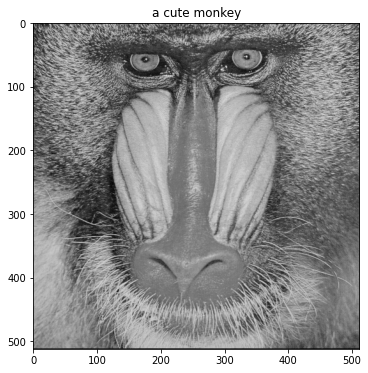

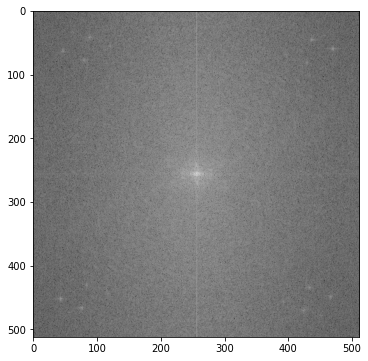

In [2]:
I = Image.open("img/mandrill.png")
imshow(I,"a cute monkey")
Z = computeFourrier(I)
imshow(displayLogFT(Z))

2. Write a function `idealLowPassFilter(n,m,fc)` returning an ideal low pass filter with frequency cutoff $f_c$ and size $n\times m$. Recall: this function set to 1 pixels at Euclidian distance $f_c$ from the center (null frequency).

In [3]:
def idealLowPassFilter(m,n,fc):
    filter = np.zeros((m,n))
    for x in range(0,m):
        for y in range(0,n):
            filter[x][y] = np.sqrt((((m-1)/2)-x)**2 + (((n-1)/2)-y)**2)

    return np.where(filter < fc, 1, 0)

print(idealLowPassFilter(10,5,3))

[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 1 1 1 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 1 1 1 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


3. Write a function `lowPass(I,fc)` performing a low pass filtering of an image $I$. The function should
 - compute the centered Fourier transform of $I$
 - multiply point-by-point the spectrum with the ideal low filter produced by `idealLowPassFilter()`
 - uncenter the filtered spectrum and apply the inverse Fourier transform (function `ifft2()` from module `numpy.fft`
 - return the real part of filtered image

In [4]:
def lowPass(I, fc, showFourrier=False):
    shape = np.array(I).shape
    Z = fftshift(computeFourrier(I))
    filter = idealLowPassFilter(shape[0],shape[0],fc)
    Z = Z * filter
    Z = ifftshift(Z)
    if(showFourrier is True):
        imshow(displayLogFT(Z), "Fourrier with lowpass filter applied")
    return ifft2(Z).real


4. Experiment this function on `img/mandrill.png` and `img/lena.jpg` with various values of cut off $f_c$.
 - give two effects that appears when $f_c$ decreases,
 - propose two applications of this filtering.


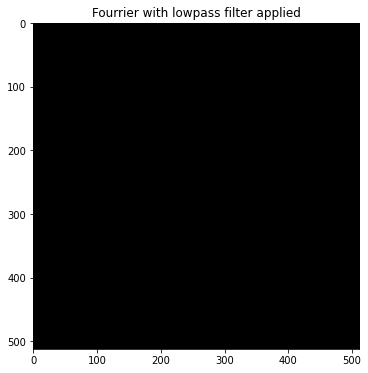

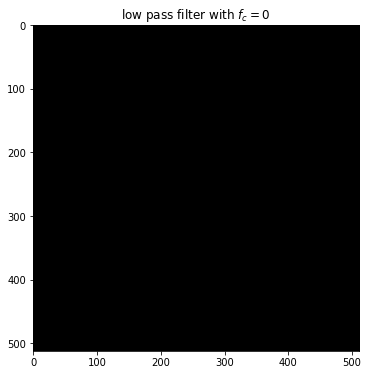

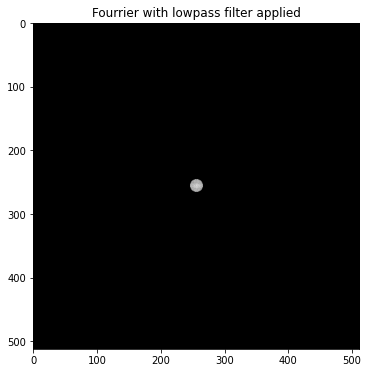

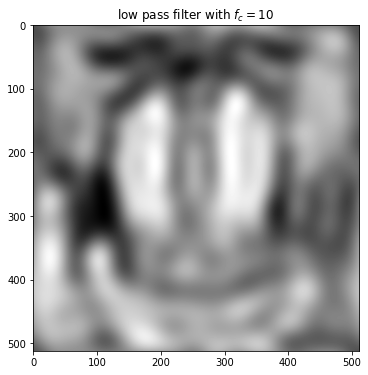

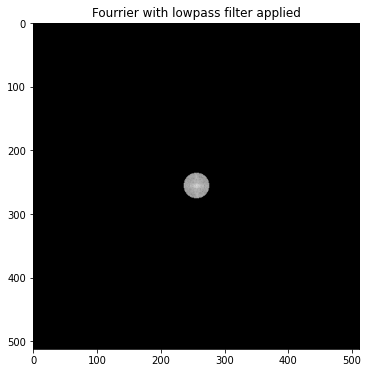

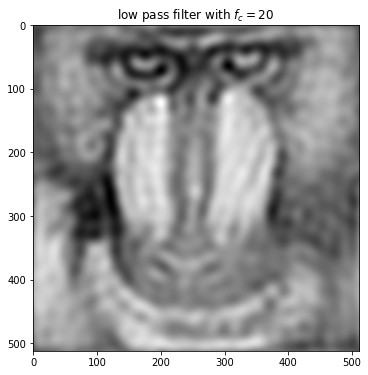

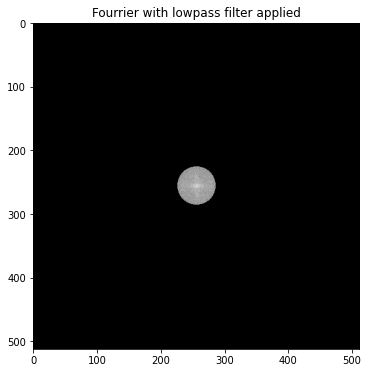

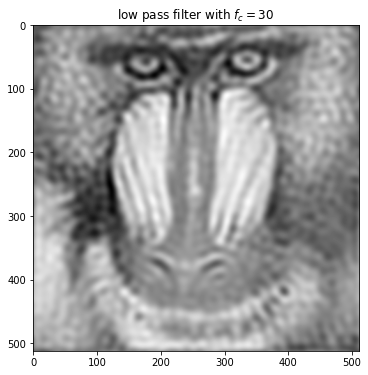

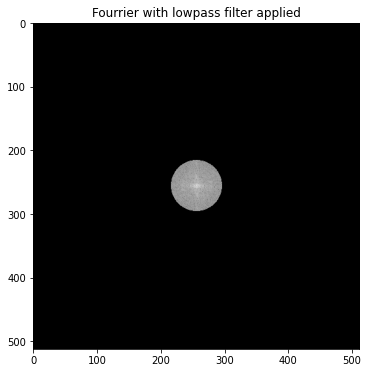

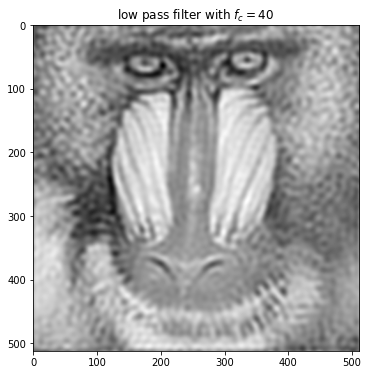

In [5]:
for i in range(0,5):
    If = lowPass(I, 10*i, True)
    imshow(If, f"low pass filter with $f_c = {10*i}$ ")

## Exercice 2 -  Linear filtering (convolution)

1. Given a kernel convolution of size $d\times d$, $d$ being odd. How many lines and columns should be added to each side of the image to apply this filter? The image is supposed surrounded by zero values.

2. Write a function `imagePad(I,h)` getting an image and a kernel, returning a new image padded with zeros according to question 1. It is not allowed to use a module implementing the padding.

In [6]:
def imagePad(I,h):
    shape = np.array(I).shape
    add = int((h.shape[0] - 1)/2)
    newImage = np.zeros((add*2 + shape[0],add*2 + shape[1]))
    newImage[add:-add, add:-add] = I
    return newImage

3. Write a function `conv2(I,h)` getting an image and a kernel and returning the convolution of $I$ by $h$. The function should return an image having the same shape than $I$. It is not allowed to use a module implementing the convolution.

In [7]:
def conv2(I,h):
    shape = np.array(I).shape
    img = np.zeros(shape)
    imPad = imagePad(I,h)
    for x in range(shape[0]):
        for y in range(shape[1]):
            selectedNeigbourg = imPad[x:x+h.shape[0],y:y+h.shape[1]] 
            img[x][y] = (selectedNeigbourg * h).sum()
    
    return img

4. Try this function on mean filter of size $3\times3$, $5\times 5$ and $7\times 7$. Discuss the results.

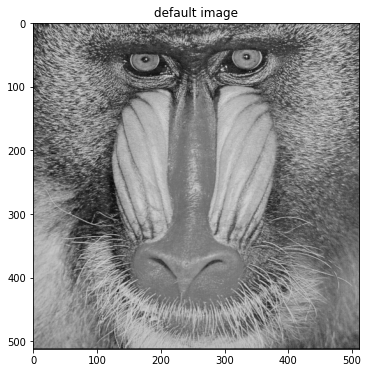

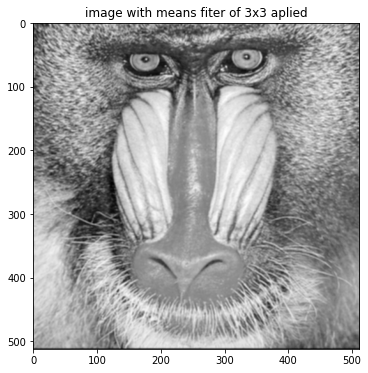

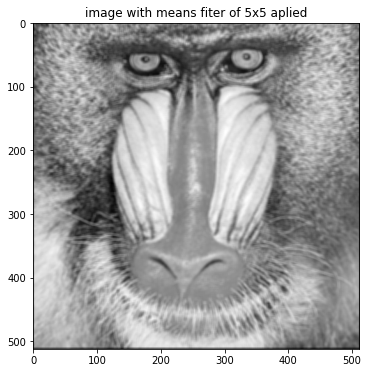

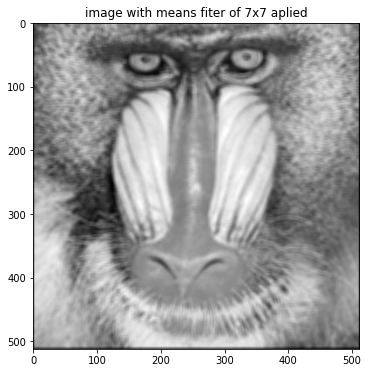

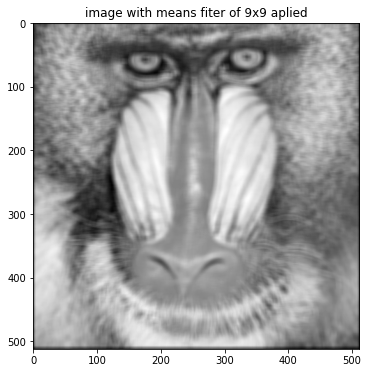

In [8]:
imshow(I, "default image")
for i in [3,5,7,9]:
    h = np.ones((i,i))
    h *= 1/(h.shape[0]*h.shape[1])
    imshow(conv2(I,h), f"image with means fiter of {i}x{i} aplied")

we are playing kernel of different size at to the monkey picture, and it get blurrier each time the kernel increase.
this is normal because it due to the type of kernel we have applied to the picture, a mean filter, it will smooth out any detail in the final picture and the lager the kernel is the smoother the picture will be, this also applied in the frencancy world. it will also smooth out any high frequancy.

also the bigger the kernel, the clearer we can see a con due to zero padding, the means of the borders pixels are way darker than the other pixel of the image.

5. Display the transfert function of these mean filters. For a better visualization, use the zero-padding technique to obtain a filter with a large size (for instance $256\times 256$). Use `imshow()` and `toVisualizeLogFT()`.

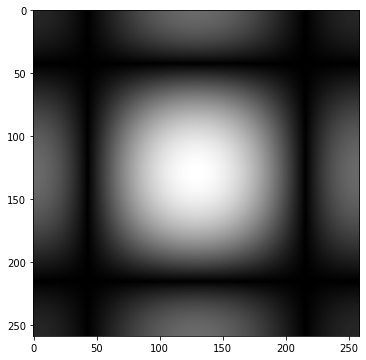

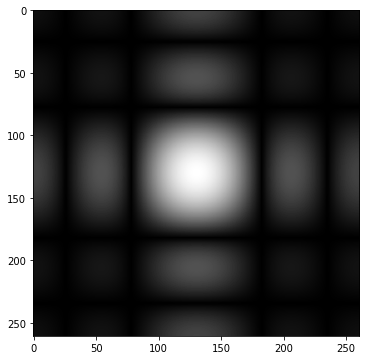

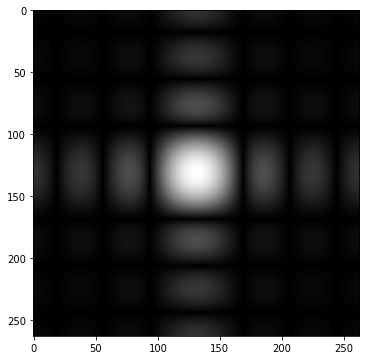

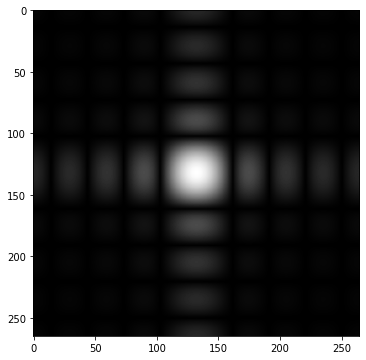

In [9]:
for i in [3,5,7,9]:
    h = np.ones((i,i))
    h *= 1/(h.shape[0]*h.shape[1])
    
    add = int((256)/2)
    newImage = np.zeros((add*2 + h.shape[0],add*2 + h.shape[1]))
    newImage[add:-add, add:-add] = h
    
    imshow(displayLogFT(computeFourrier(newImage)))

6. Interpretation: what is the analytic expression of the transfert function of a mean filter? Is  it an ideal low pass filter?

**is it an ideal low pass filter ?**
well is it a circle ? no, it's  square

joke aside, it's not a ideal low pass filter, but it as a really low cost in performance, so it's a trade off between quality for perfomance.

7. Bonus question: perform the same study for the Gaussian kernel. Determine $\sigma$ in order to have filter of size $3\times3$, $5\times5$, and $7\times7$.

In [10]:
def gaussianKernel(sigma):
    """ double -> Array
        return a gaussian kernel of standard deviation sigma
    """
    n2 = np.int(3*sigma)
    x,y = np.meshgrid(np.arange(-n2,n2+1),np.arange(-n2,n2+1))
    kern = np.exp(-(x**2+y**2)/(2*sigma*sigma))
    return  kern/kern.sum()
### your answer start below


## Exercice 3: anti aliasing filtering

1. Give a code that subsamples of factor 2 (use function `subSample2()` given in TME3) the image `img/barbara.png`.

In [11]:
def subSample(I, factor=2):
    """ Array -> Array """
    return I[::factor,::factor]

2. Give a code that subsamples of factor 2 (use function `subSample2()`) the image `img/barbara.png` after applying an low pass filter (use `antiAliasingFilter()`). As comment, recall the principle of filtering in the frequency domain.

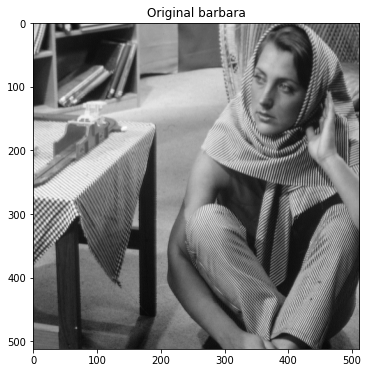

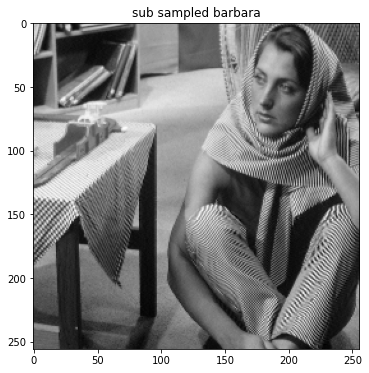

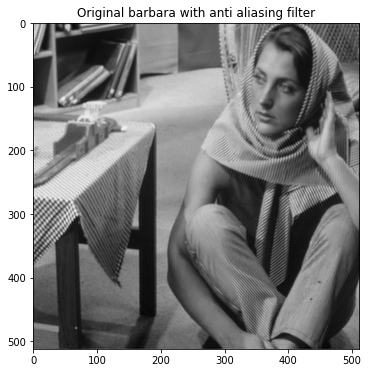

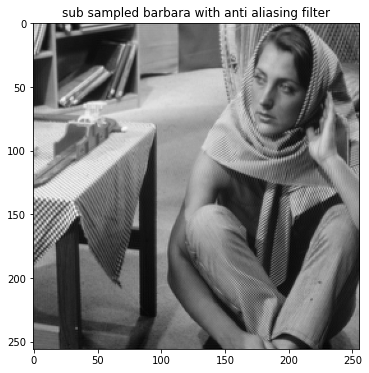

In [12]:
def antiAliasingFilter(n,m):
    """ int*int -> Array """
    n2, m2 = n//2, m//2
    rn, rm = n//4, m//4
    A = np.zeros((n, m))
    A[rn:rn+n2, rm:rm+m2] = 1
    return A
### your answer start below

barbara = Image.open("img/barbara.png")

shape = np.array(barbara).shape
Z = fftshift(computeFourrier(barbara))
kernel = antiAliasingFilter(int(shape[0]),int(shape[1]))
Z = Z * kernel
Z = ifftshift(Z)
bconv = ifft2(Z).real

imshow(barbara, "Original barbara")
imshow(subSample(np.array(barbara)), "sub sampled barbara")

imshow(bconv, "Original barbara with anti aliasing filter")
imshow(subSample(bconv), "sub sampled barbara with anti aliasing filter")


3. Describe and analyze the filtering of Barbara with and without the anti aliasing filter. What information is lost for the two filtered images ?

the image without any filter when down sampled make moiré pattern to show up but of the Shannon law.

On the other side, when filtered with the anti aliasing the image lose all the high frequency who wouldn't be properly down sampled. but the resulting image is clean of any moiré pattern 

## Exercice 4: color image
1. Read images `img/clown.bmp` and `img/clown_lumi.bmp` as two arrays named $I_1$ and $I_2$. Display these images examine their shape. What difference there are between them?

In [13]:
I1 = np.array(Image.open("img/clown.bmp"))
I2 = np.array(Image.open("img/clown_lumi.bmp"))

print("shape of I1 :", I1.shape)
print("shape of I2 :", I2.shape)

shape of I1 : (512, 512, 3)
shape of I2 : (512, 512)


The $I_1$ picture is in 3 dimension for the Red, Green and blue Blue.

2. The first image is an array of dimension 3. Explain the signification of each dimension. From this image create 3 images $I_R$, $I_G$, $I_B$ of dimension 2. Display these three images and explain what you see.

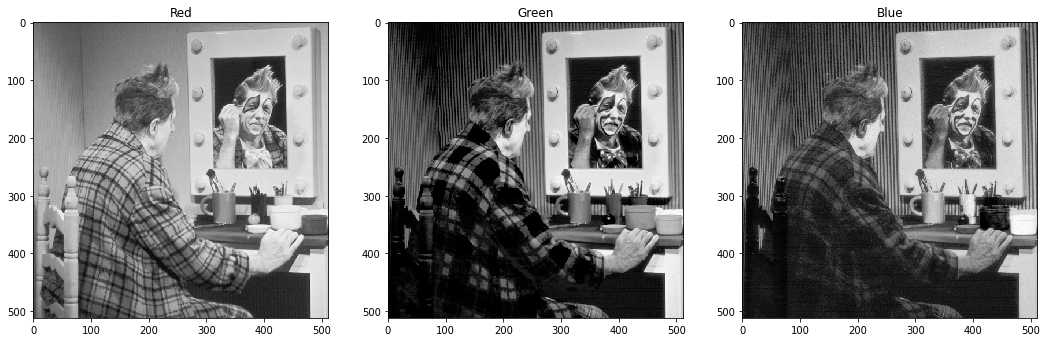

In [14]:
IR = I1[:,:,0]
IG = I1[:,:,1]
IB = I1[:,:,2]
niceDisplay14([IR,IG,IB],["Red","Green","Blue"])

each picture represente a color channel. Each channel is codded on 256 bits there is a total of 3 bytes per pixel, thus for a total of 16 millions color possible.

looking at the gray scale of the image we can perform some easy eyes spoting awnsers. the bringter a channel is the more present the color is in the picture.

3. Create a new image $I_3$ of dimensions 3, the first dimension contains the value of $I_R$, the second the value of $I_B$ and the third the values of $I_G$. Try another combinations. Remark: color images are better handled by `imshow()` if pixel values range in $[0,1]$.

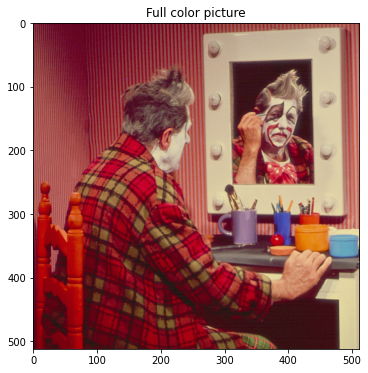

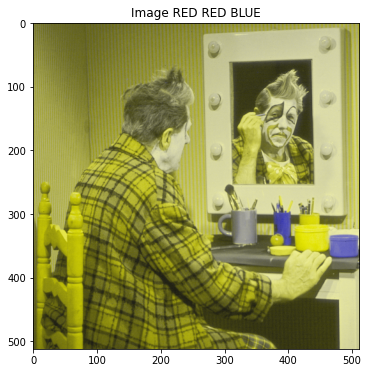

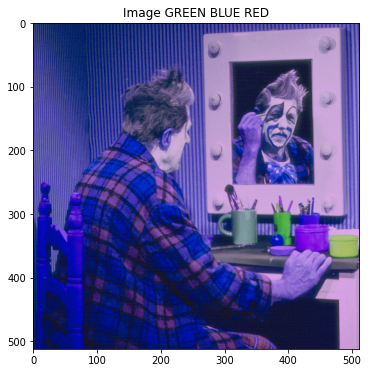

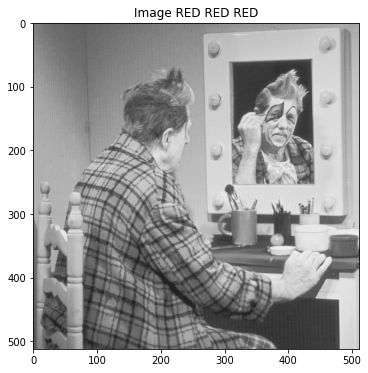

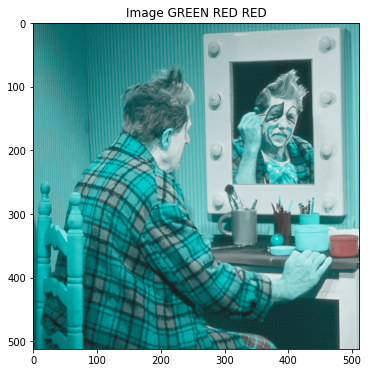

In [15]:
imshow(I1,"Full color picture")

I3 = np.stack((IR,IR,IB), axis=2)
imshow(I3, "Image RED RED BLUE")

I3 = np.stack((IG,IB,IR), axis=2)
imshow(I3, "Image GREEN BLUE RED")

I3 = np.stack((IR,IR,IR), axis=2)
imshow(I3, "Image RED RED RED")

I3 = np.stack((IG,IR,IR), axis=2)
imshow(I3, "Image GREEN RED RED")

4. Write a code that allows the see the first channel with red color scales, the second channel in green color scales, and the blue channel in blue color scales.

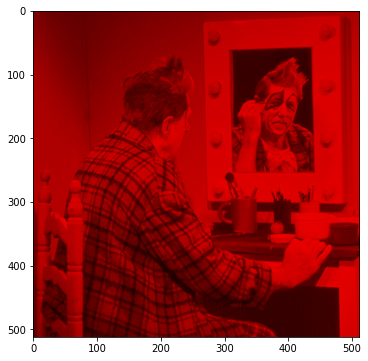

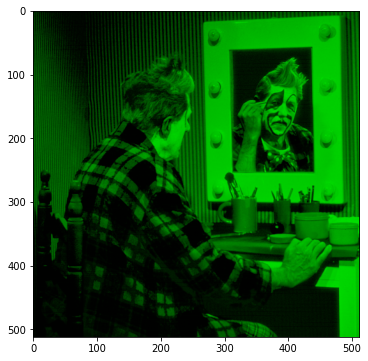

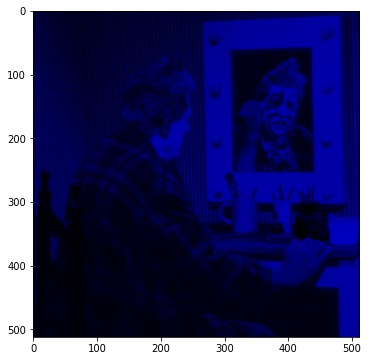

In [16]:
redChannel = np.stack((IR,np.zeros(IR.shape),np.zeros(IR.shape)),axis=2)
redChannel /= 255
imshow(redChannel)

greenChannel = np.stack((np.zeros(IR.shape),IG,np.zeros(IR.shape)),axis=2)
greenChannel /= 255
imshow(greenChannel)

blueChannel = np.stack((np.zeros(IR.shape),np.zeros(IR.shape),IB),axis=2)
blueChannel /= 255
imshow(blueChannel)